**Imports**

In [32]:
import numpy as np
import matplotlib.pyplot as plt

**Neural Network Class Definition**

In [33]:
class NeuralNetwork:
    def __init__(self, input_size, hidden1_size, hidden2_size, output_size):
        # Initialize parameters
        self.input_size = input_size
        self.hidden1_size = hidden1_size
        self.hidden2_size = hidden2_size
        self.output_size = output_size

        # Initialize weights and biases with random values
        self.W1 = np.random.randn(self.input_size, self.hidden1_size)
        self.b1 = np.zeros((1, self.hidden1_size))
        self.W2 = np.random.randn(self.hidden1_size, self.hidden2_size)
        self.b2 = np.zeros((1, self.hidden2_size))
        self.W3 = np.random.randn(self.hidden2_size, self.output_size)
        self.b3 = np.zeros((1, self.output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        return x * (1 - x)

    def forward_propagation(self, X):
        # First hidden layer
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = self.sigmoid(self.z1)

        # Second hidden layer
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = self.sigmoid(self.z2)

        # Output layer
        self.z3 = np.dot(self.a2, self.W3) + self.b3
        self.a3 = self.sigmoid(self.z3)

        return self.a3

    def backward_propagation(self, X, y, learning_rate):
        # Calculate output error
        error = y - self.a3
        delta3 = error * self.sigmoid_derivative(self.a3)

        # Calculate hidden layer 2 error
        error2 = delta3.dot(self.W3.T)
        delta2 = error2 * self.sigmoid_derivative(self.a2)

        # Calculate hidden layer 1 error
        error1 = delta2.dot(self.W2.T)
        delta1 = error1 * self.sigmoid_derivative(self.a1)

        # Update weights and biases
        self.W3 += self.a2.T.dot(delta3) * learning_rate
        self.b3 += np.sum(delta3, axis=0, keepdims=True) * learning_rate
        self.W2 += self.a1.T.dot(delta2) * learning_rate
        self.b2 += np.sum(delta2, axis=0, keepdims=True) * learning_rate
        self.W1 += X.T.dot(delta1) * learning_rate
        self.b1 += np.sum(delta1, axis=0, keepdims=True) * learning_rate

        # Return mean squared error
        return np.mean(np.square(error))

    def train(self, X, y, epochs, learning_rate, verbose=True):
        errors = []
        for epoch in range(epochs):
            # Forward propagation
            output = self.forward_propagation(X)

            # Backward propagation
            error = self.backward_propagation(X, y, learning_rate)
            errors.append(error)

            if verbose and (epoch % (epochs//10) == 0 or epoch == epochs-1):
                print(f"\nEpoch {epoch}:")
                print(f"Input: {X}")
                print(f"Target: {y}")
                print(f"Predicted: {output}")
                print(f"Error: {error:.6f}")

                # Print intermediate values
                print("\nIntermediate Values:")
                print("Hidden Layer 1:")
                print(f"  Weighted Sum (z1): {self.z1}")
                print(f"  Activation (a1): {self.a1}")

                print("\nHidden Layer 2:")
                print(f"  Weighted Sum (z2): {self.z2}")
                print(f"  Activation (a2): {self.a2}")

                print("\nOutput Layer:")
                print(f"  Weighted Sum (z3): {self.z3}")
                print(f"  Activation (a3): {self.a3}")

        return errors


**Example Usage - Data Setup**

In [34]:
if __name__ == "__main__":
    # Define input and target output
    X = np.array([[0.5, 0.8]])  # Input
    y = np.array([[0.2, 0.9]])   # Target output

    # Create neural network
    nn = NeuralNetwork(input_size=2, hidden1_size=2, hidden2_size=2, output_size=2)

**Training the Network**

In [35]:
    # Train the network
    epochs = 1000
    learning_rate = 0.1
    errors = nn.train(X, y, epochs, learning_rate)


Epoch 0:
Input: [[0.5 0.8]]
Target: [[0.2 0.9]]
Predicted: [[0.53260509 0.50651089]]
Error: 0.132730

Intermediate Values:
Hidden Layer 1:
  Weighted Sum (z1): [[1.2760574  0.20775459]]
  Activation (a1): [[0.78177791 0.55175264]]

Hidden Layer 2:
  Weighted Sum (z2): [[-0.02711043 -1.08221317]]
  Activation (a2): [[0.49322281 0.25308742]]

Output Layer:
  Weighted Sum (z3): [[0.1306057  0.02604505]]
  Activation (a3): [[0.53260509 0.50651089]]

Epoch 100:
Input: [[0.5 0.8]]
Target: [[0.2 0.9]]
Predicted: [[0.3520391  0.70784355]]
Error: 0.030020

Intermediate Values:
Hidden Layer 1:
  Weighted Sum (z1): [[1.30475794 0.18642351]]
  Activation (a1): [[0.78663465 0.54647137]]

Hidden Layer 2:
  Weighted Sum (z2): [[ 0.08281561 -1.17451014]]
  Activation (a2): [[0.52069208 0.23604072]]

Output Layer:
  Weighted Sum (z3): [[-0.61008809  0.88493365]]
  Activation (a3): [[0.3520391  0.70784355]]

Epoch 200:
Input: [[0.5 0.8]]
Target: [[0.2 0.9]]
Predicted: [[0.2808239  0.78215635]]
Error: 0

**Visualization**

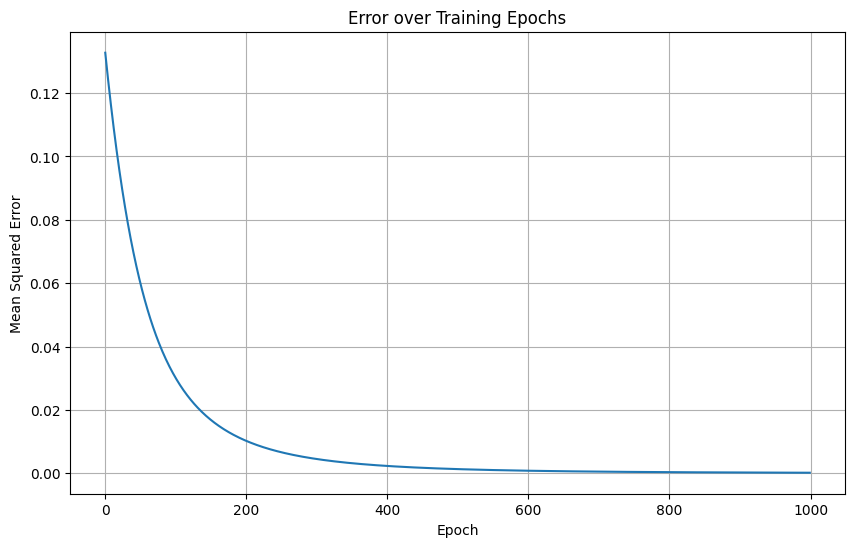

In [36]:
    # Visualize the error over epochs
    plt.figure(figsize=(10, 6))
    plt.plot(range(epochs), errors)
    plt.title("Error over Training Epochs")
    plt.xlabel("Epoch")
    plt.ylabel("Mean Squared Error")
    plt.grid(True)
    plt.show()